### ASTR 3300/5300$-$003: Astrostatistics
***N. Pol***
___

# Homework 2
### Due: Friday, Feb 7, at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4 .$$

1) Write down the usual form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

2) Manipulate the above equation such that you can write the left hand side in terms of a normalized half-Gaussian distribution. 

3) Draw $N=10^5$ samples from a $\sigma=3$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your equation in (2). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

4) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

5) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

the whole sum is 0.999999999986916
the half sum is 1.2135166882744717


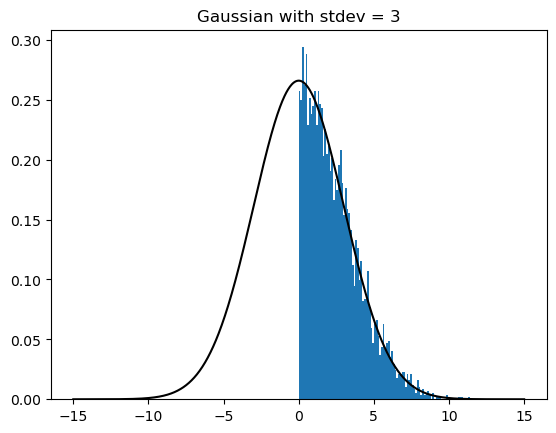

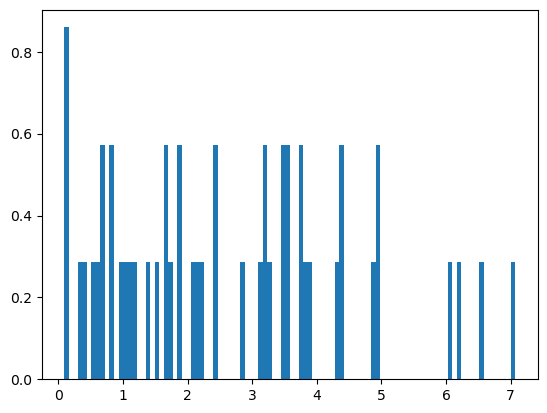

the half sum for 100 is 1.3125913331866417


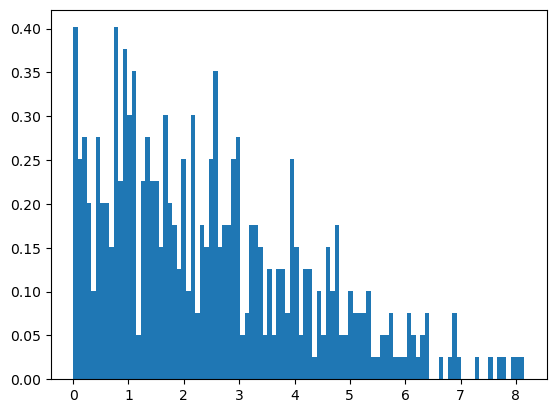

the half sum for 1000 is 1.2062449607323678


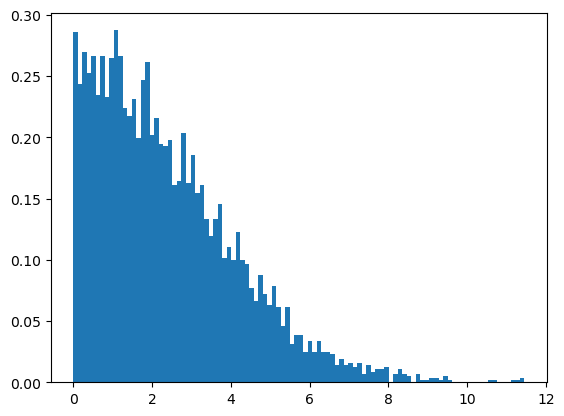

the half sum for 10000 is 1.186096152469954


In [7]:
# Problem 1

# 1) 
# general gaussian distribution with mu = 0 takes the form: (1/(sigma*sqrt(2*pi))) * exp((-(x)^2)/(2*sigma^2)
# the the half-distribution between 0 and +infinity is the standard one but multiplied by two; ie the normalization constant changes from 
# 1/(sigma*sqrt(2*pi)) to 2/(sigma*sqrt(2*pi))

# 2) 
# currently I am confused about the x**3 factor in the given integral. because of that factor, im not sure how to write the given 
# integral in terms of a normalized half gaussian without evaluating the half gaussian first. Is that what this problem is asking for?


# 3)
import scipy.stats
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt

N = 10000
Gaussian1 = scipy.stats.norm(0, 3)
draws = Gaussian1.rvs(N)
#print(draws)
xgrid = np.linspace(-15, 15, 1000)
PDF1 = Gaussian1.pdf(xgrid)


mask = draws > 0 
#print(mask) #prints a list of booleans. okay. 
monte_carlo = draws[mask]
#print(monte_carlo) #neat. the new array includes only positive values. 
plt.figure(1)
plt.plot(xgrid, 2 * PDF1, color = 'black') #extra factor of two in the normalization constant
plt.title('Gaussian with stdev = 3')
plt.hist(monte_carlo, bins = 100, density = True)

whole_gaussian = Gaussian1.cdf(20)
print('the whole sum is', whole_gaussian) #close enough to one

integral = np.sum(monte_carlo/N)
print('the half sum is', integral)

# thats pretty close, but note that I'm not sure that I've done what you actually intended due to finding the wording confusing. 

# part 4
# I am not sure if this is asking for a repeat of pt 3 but with different orders of magnitude for N, or if this is asking for pt 3 
# but with several different tries of N = 100 samples each. 
def plotting():
    # this is not a terribly generalized function, but itll work for now. 
    a = 2
    while a < 5:
        M = 10**a
        draws = Gaussian1.rvs(M)
        mask = draws > 0 
        monte_carlo3 = draws[mask]
        a += 1
        plt.figure(a)
        plt.hist(monte_carlo3, bins = 100, density = True)
        plt.show()
        integral = np.sum(monte_carlo3/M)
        print('the half sum for', M, 'is', integral)
        
plotting()

# part 5
# the sum does seem to get a little more accurate as N gets bigger. 
# need to find and record index max and min for each pass through that while loop then plot. 

## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=145$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^4$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 145? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

the PDF at 145 is 0.0002954565607958672
0.13498980316301035
171.30136463234348


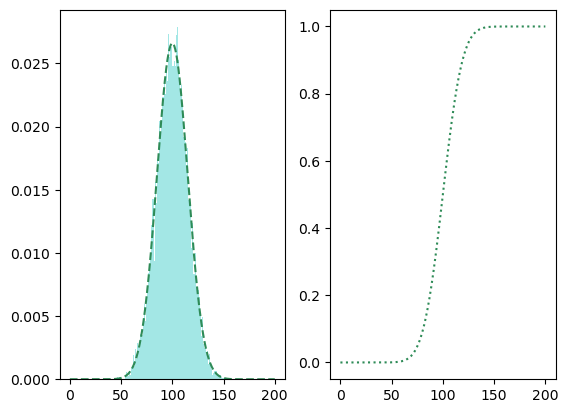

In [83]:
# Problem 2

# 1) the distro

Gaussian2 = scipy.stats.norm(100, 15)
xgrid = np.linspace(0, 200, 1000)
PDF2 = Gaussian2.pdf(xgrid)
plt.subplot(1, 2, 1)
plt.plot(xgrid, PDF2, color = 'seagreen', linestyle = '--') # hey future me: ya might wanna mess with the figure scaling here

N = 10
draws = Gaussian2.rvs(N)
# print(draws)

print('the PDF at 145 is', Gaussian2.pdf(145))

# 2) the CDF and PPF, and inverse transform sampling

CDF2 = Gaussian2.cdf(xgrid)

plt.subplot(1, 2, 2)
plt.plot(xgrid, CDF2, color = 'seagreen', linestyle = ':')

PPF2 = Gaussian2.ppf(xgrid)

N2 = 10000
uniform = np.random.uniform(0, 1, N2)
PPF3 = Gaussian2.ppf(uniform)
plt.subplot(1, 2, 1)
plt.hist(PPF3, bins = 100, alpha = 0.5, density = True, color = 'mediumturquoise')


# 3) What fraction are > 145? about 0.3% iirc. But in order to find it for real, integrate from 145 to inf

Fraction = Gaussian2.cdf(145)
Ans = (1 - Fraction) * 100
print(Ans) # so about 0.135%

# 4) What number is "one in a million"

mill = scipy.stats.norm.isf(0.000001, 100, 15)
print(mill)
# about 171

In [112]:
scipy.stats.norm?


Signature:       scipy.stats.norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x128955a90>
File:            /opt/anaconda3/envs/ASTR3300_pt1/lib/python3.13/site-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (``loc``) keyword specifies the mean.
The scale (``scale``) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution functio

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

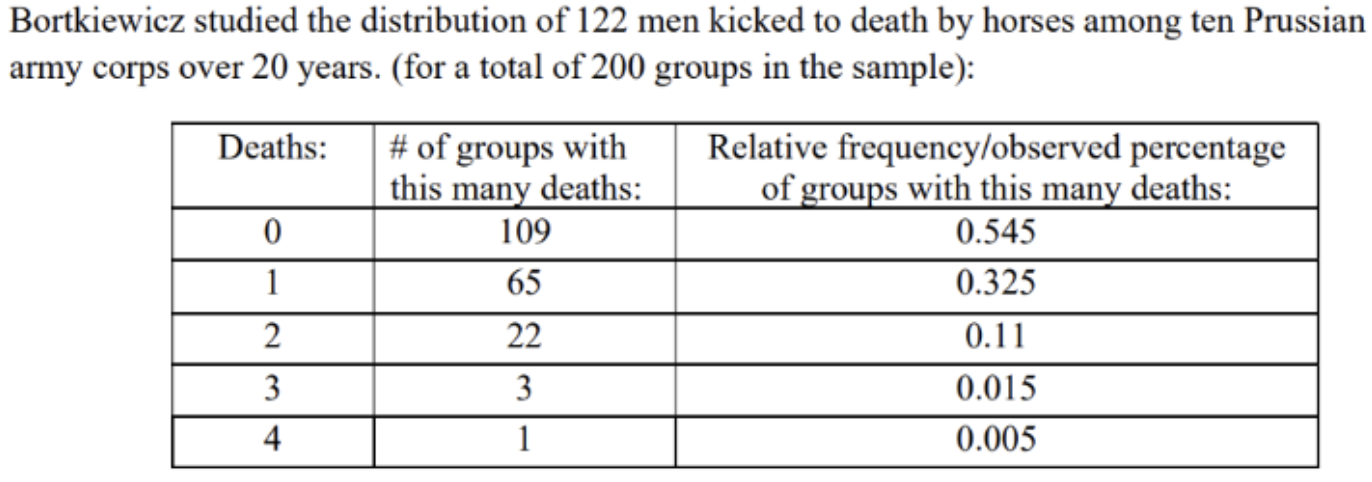

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting next week, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

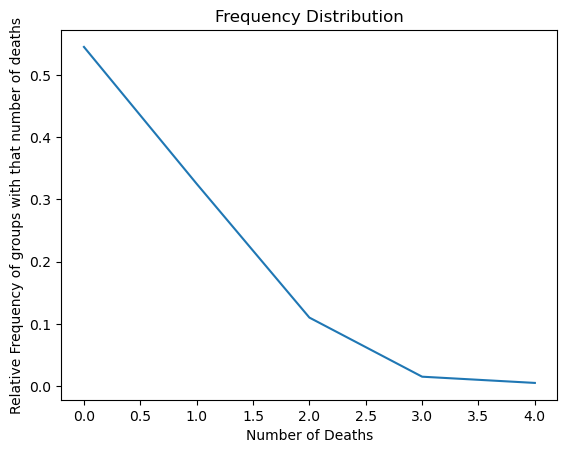

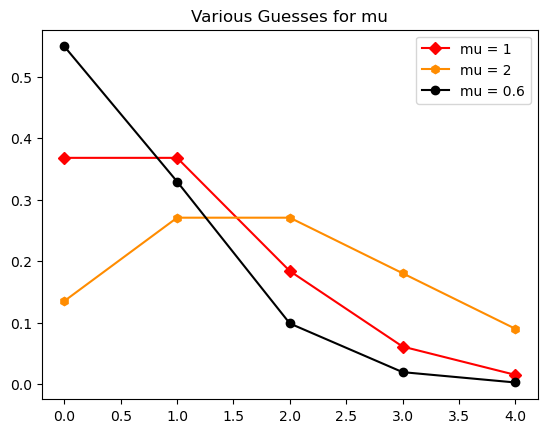

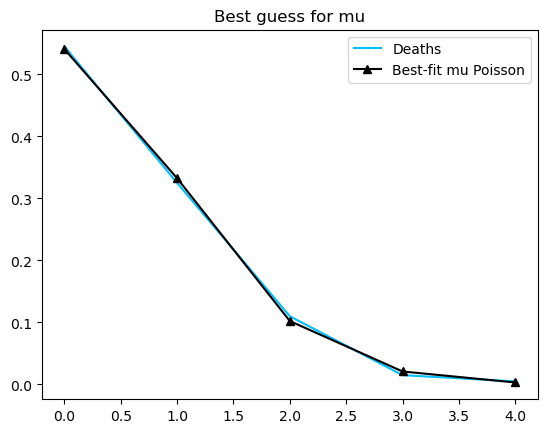

In [87]:
# trying to understand this data table at the moment....
#total = 65 + 2*22 + 3*3 + 4
#print(total) #okay that does add up to 122 total deaths

# part 1

deaths = [0, 1, 2, 3, 4]
death_frequency = [0.545, 0.325, 0.11, 0.015, 0.005] #that has to be the name of some metal band somewhere
plt.figure(1)
plt.plot(deaths, death_frequency)
plt.xlabel('Number of Deaths')
plt.ylabel('Relative Frequency of groups with that number of deaths')
plt.title('Frequency Distribution')

# part 2

xgrid = np.arange(0, 5, 1)
guess_1_pmf = scipy.stats.poisson.pmf(xgrid, 1)
guess_2_pmf = scipy.stats.poisson.pmf(xgrid, 2)
guess_3_pmf = scipy.stats.poisson.pmf(xgrid, 0.6) # there we go

plt.figure(2)
plt.plot(xgrid, guess_1_pmf, color = 'red', marker = 'D') 
plt.plot(xgrid, guess_2_pmf, color = 'darkorange', marker = 'h') # that aint it
plt.plot(xgrid, guess_3_pmf, color = 'black', marker = 'o')
plt.title('Various Guesses for mu')
plt.legend(['mu = 1', 'mu = 2', 'mu = 0.6'])
# seems to be mu ~ 0.6

# part 3

# We do have a dist where loc = 0, which is nice. lets test. 
mu = 0.6
mean, variance, skew, kurt = scipy.stats.poisson.stats(mu, moments='mvsk')
stdev = scipy.stats.poisson.std(mu)
#print(mean, variance) 
#print('the standard deviation is', stdev) # makes sense 

guess_4_pmf = scipy.stats.poisson.pmf(xgrid, 0.615)
plt.figure(3)
plt.plot(deaths, death_frequency, color = 'deepskyblue')
plt.plot(xgrid, guess_4_pmf, color = 'black', marker = '^')
plt.title('Best guess for mu')
plt.legend(['Deaths', 'Best-fit mu Poisson'])